# Lexical Normalization for Hindi & Bangla Data

In [11]:
import requests
import pandas                        as pd
import numpy                         as np
import math

import seaborn                       as sns
import matplotlib.pyplot             as plt

from googletrans                     import Translator
translator = Translator()

from collections                     import Counter
from nltk.corpus                     import stopwords
import itertools
import re
import httpx
timeout = httpx.Timeout(1) # 1 second timeout

In [12]:
def to_monolingual(df, dest):
    monol = []
    df_count = 0
    for i in range(df.shape[0]):
        temp_list = [df.iloc[i,0],df.iloc[i,1],df.iloc[i,2],df.iloc[i,3]]
        sentence=temp_list[1]
        temp_translate = " ".join([translator.translate(x, dest=dest, timeout=timeout).text.lower() for x in sentence.split()])
        temp_list.append(temp_translate)
        monol.append(temp_list)
        if i % 10 == 0:
            temp_df = pd.DataFrame(monol, columns = ['ID', 'Text', 'Sub-task A', 'Sub-task B', 'monolingual'])
            temp_df.to_excel("ben_mono.xlsx",index = False)
            print("Successfully saved: ",i," records.")
#         " ".join(sentence.split().apply(lambda x : translator.translate(x, src="hi", dest="hi").text.lower()))
#         monol.append(" ".join([translator.translate(x, dest=dest, timeout=timeout).text.lower() for x in sentence.split()]))
#     df["monolingual"] = monol

In [13]:
def barplot(df, x, y, title, label, ylabel, dim, orient = "v", ci = False, hue = None):
    
    plt.figure(figsize = dim, facecolor = "white")
    sns.barplot(x = x, y = y, data = df, orient = orient, ci = ci, hue = hue)
    plt.title(f"{title}", size = 18)
    plt.xlabel(f"{label}", size = 16)
    plt.ylabel(f"{ylabel}", size = 16)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.tight_layout();

In [14]:
def fetch_stopwords(url):
    stop = pd.read_csv(url, sep='\n', header=0, names=['words'])
    stop = stop['words'].values.tolist()
    return stop

In [15]:
# from stopwordsiso import stopwords
# bangla_stopwords = stopwords('bn')

hinglish_stopwords = fetch_stopwords('https://raw.githubusercontent.com/TrigonaMinima/HinglishNLP/master/data/assets/stop_hinglish')
english_stopwords = set(stopwords.words('english') + hinglish_stopwords)
hindi_stopwords = set(fetch_stopwords('https://raw.githubusercontent.com/TrigonaMinima/HinglishNLP/master/data/assets/stop_hindi'))
bangla_stopwords = set(fetch_stopwords('https://raw.githubusercontent.com/rachitsaksena/Multilingual-Agression-Classification/master/Cache/Models/bangla%20stop.txt'))

In [16]:
stop_dict = {'en': english_stopwords,
             'hi': hindi_stopwords,
             'bn': bangla_stopwords}

In [17]:
def deEmojify(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F923"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [18]:
def clean_text(df, lang):
    stop_words = stop_dict[lang]
    df['monolingual'] = df["normalized lexicon"]
    for i in range(df.shape[0]):
        sentence = df["normalized lexicon"].iloc[i]
        sentence = deEmojify(sentence)
        sentence = re.sub(r"([.!?|])", r"", sentence)
        sentence = re.sub(r'[/(){}\[\]\|@,;:.]', r'', str(sentence))
#         sentence = re.sub(r"[^a-z]+", r" ", sentence)
        sentence = ' '.join(word for word in sentence.split() if word not in stop_words and len(word)>2)
        df['monolingual'].iloc[i] = sentence
#     df['tokenized'] = [tokenizer.tokenize(text) for text in df['clean text']] #problem
#     df['tokenized'] = [text.split() for text in df['clean text']]
    return df

## HINDI

In [19]:
hin_train = pd.read_csv('Data/trac2_hin_train.csv')
hin_test = pd.read_csv('Data/trac2_hin_dev.csv')
hin = hin_train.append(hin_test)
hin.head()

,ID,Text,Sub-task A,Sub-task B
0,C4.131,Bollywood film dekhne ke samay logic ghar mein...,NAG,NGEN
1,C4.638,Chutiya movie...,NAG,NGEN
2,C38.598,Us jaat bnde ka khene ka matlab tha mar daluga...,OAG,NGEN
3,C4.2101.1,@Feminism Is CANCER *un feminist yeh sahi hai ...,OAG,NGEN
4,C29.14.2,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,NAG,NGEN


In [20]:
to_monolingual(hin, dest='hi')

HINDI
NAG    2823
OAG    1118
CAG    1040
Name: Sub-task A, dtype: int64


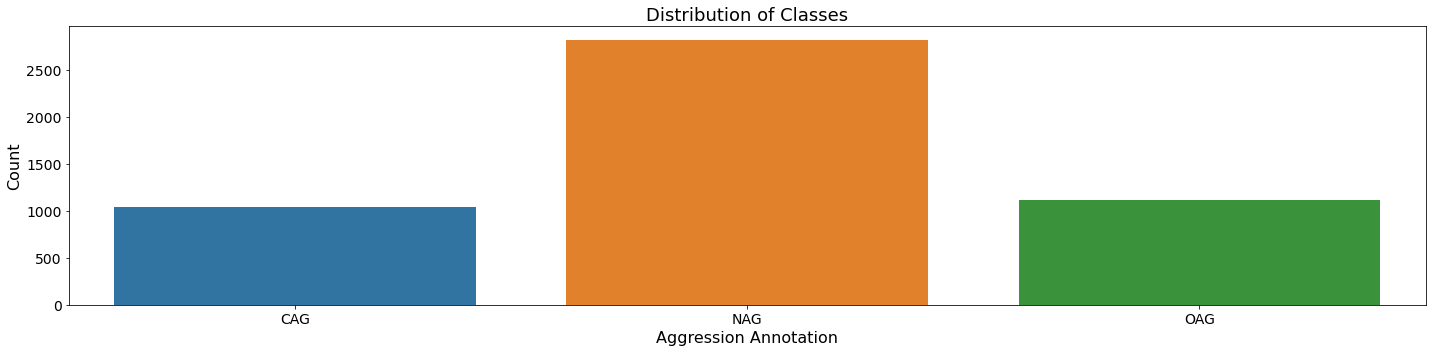

In [21]:
taskA_df = (hin.set_index(['ID', 'Sub-task A']).count(level='Sub-task A'))

barplot(df = taskA_df,
        x = taskA_df.index,
        y = "Text",
        title = "Distribution of Classes",
        label = "Aggression Annotation",
        ylabel = "Count",
        dim = (20, 5))

print('HINDI')
print(hin['Sub-task A'].value_counts())

In [23]:
hin

,ID,Text,Sub-task A,Sub-task B,normalized lexicon,monolingual
0,C4.131,Bollywood film dekhne ke samay logic ghar mein...,NAG,NGEN,बॉलीवुड फ़िल्म देखने के समय तर्क घर में चोर मा...,बॉलीवुड फ़िल्म देखने समय तर्क में चोर मां झुंड...
1,C4.638,Chutiya movie...,NAG,NGEN,चुटिया चलचित्र...,चुटिया चलचित्र
2,C38.598,Us jaat bnde ka khene ka matlab tha mar daluga...,OAG,NGEN,हमें जाट बंदे का कहने का मतलब था समुद्र डालूगा...,हमें जाट बंदे कहने मतलब समुद्र डालूगा उपयोग पर...
3,C4.2101.1,@Feminism Is CANCER *un feminist yeh sahi hai ...,OAG,NGEN,@feminism है कैंसर *ए नारीवादी ये सही है परंतु...,feminism कैंसर नारीवादी सही परंतु मतलब थोड़ी सा...
4,C29.14.2,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,NAG,NGEN,अमृत आनंद अब तो जुड़े ही है उनको बोलो जुड़ने,अमृत आनंद जुड़े बोलो जुड़ने
...,...,...,...,...,...,...
992,C29.18,Are bhai konsi duniya mai rehate ho😂😂,NAG,NGEN,कर रहे हैं भाई कोनसी दुनिया मई रहते ho😂😂,भाई कोनसी दुनिया रहते
993,C9.225,Sahi to bola,NAG,NGEN,सही सेवा वह थी,सही सेवा
994,C7.1685,Or tum Kay Kar raya ho?,NAG,NGEN,या तुम kay कर राया हो?,तुम kay राया
995,C36.692.1,Ye bhaat sahi hain par zyada dhin thine ga nah...,NAG,NGEN,हाँ चावल sahi हैं पर ज़्यादा मरना तेरा परंतु नह...,हाँ चावल sahi ज़्यादा मरना तेरा परंतु कहाँ खुदा...


In [ ]:
clean_text(hin, 'hi')

In [26]:
hin.sample(5)

,ID,Text,Sub-task A,Sub-task B,normalized lexicon,monolingual
60,C4.635,badia thi,NAG,NGEN,badia thi,badia thi
898,C36.1146,Sahi BAAT hai posting pe bejo or Gand marvate ...,OAG,NGEN,सही बात है प्रविष्टि पर bejo या गांड marvate ह...,सही बात प्रविष्टि bejo गांड marvate दुश्मन मुझ...
2020,C36.504,Phle inko hawas se to santi mil jae...fr desh ...,CAG,NGEN,phle inko hawas se to santi mil jae...fr desh ...,phle inko hawas santi mil jaefr desh sochna
1280,C10.1301,Mullo ka Lund le le Kar iska dharm parivartan ...,OAG,GEN,मुल्लो का कुंज कर इसका धर्म परिवर्तन हो गया....,मुल्लो कुंज धर्म परिवर्तन गयाइस रैंडी पकड़ बन्द...
3831,C4.750,Dislike krne wali wo ladki hi Jo ladko se pais...,CAG,NGEN,नापसन्द करने वाली कहाँ पे लड़की ही जो लड़को मुझे...,नापसन्द वाली कहाँ लड़की लड़को मुझे पता पैसा लूट ...


In [25]:
hin.to_csv('./Data/cleaned hindi.csv', index=False)

## BANGLA

In [ ]:
ben_train = pd.read_csv('Data/trac2_iben_train.csv')
ben_test = pd.read_csv('Data/trac2_iben_dev.csv')
ben = ben_train.append(ben_test)
ben.head()

In [ ]:
to_monolingual(ben, dest='bn')

In [ ]:
taskA_df = (ben.set_index(['ID', 'Sub-task A']).count(level='Sub-task A'))

barplot(df = taskA_df,
        x = taskA_df.index,
        y = "Text",
        title = "Distribution of Classes",
        label = "Aggression Annotation",
        ylabel = "Count",
        dim = (20, 5))

print('BANGLA')
print(ben['Sub-task A'].value_counts())

In [ ]:
clean_text(ben, 'bn')

In [ ]:
ben.sample(5)

In [ ]:
ben.to_csv('./Data/cleaned bangla', index=False)